# **Fundamentals of Data Science - Winter Semester 2023**


#### Prof. Fabio Galasso, Stefano D'Arrigo (TA), Edoardo De Matteis (TA), Daniele Trappolini (TA)
<galasso@di.uniroma1.it>, <darrigo@di.uniroma1.it> , <dematteis@di.uniroma1.it>, <daniele.trappolini@uniroma1.it>

## **Final Project Report: Kobe Bryant Shot Selection**

#### Group<br>

<div style="float: left;">
    <table>
        <tr>
            <th>Student</th>
            <th>Matricola</th>
            <th>E-Mail</th>
        </tr>
        <tr>
            <td>Ortal Hadad</td>
            <td>2105231</td>
            <td>ortal2824@gmail.com</td>
        </tr>
        <tr>
            <td>Damian Zeller</td>
            <td>2118831</td>
            <td>damianzeller@gmx.ch</td>
        </tr>
        <tr>
            <td>André Leibrant</td>
            <td>2085698</td>
            <td>leibrant.2085698@studenti.uniroma1.it</td>
        </tr>
    </table>
</div>

#### Import Libraries and Modules

In [128]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

## Abstract



## 1. Introduction



## 2. Related Work



## 3. Proposed Methods Explained



## 4. Dataset and Benchmark

In the following we are going to load the Kaggle [dataset](https://www.kaggle.com/competitions/kobe-bryant-shot-selection/overview) into a Pandas DataFrame and obtain a summary by printing the first and last five entries and by using the `info()` and `describe()` method. 

In [60]:
# File path of dataset
file_path = "data.csv"

# Load data into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter=",", encoding="utf-8")

#### Print the first and last five entries:

In [54]:
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


#### Print the data types of each column, the number of non-null values, and the memory usage:

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

#### Descriptive statistics for the numerical columns: Count, Mean, Standard Deviation, Min, 25th Percentile, Median, 75th Percentile, and Max:

In [13]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


---

Based on the summaries above we excluded in the first step for us obvious columns we won't need for our analysis and don't add any information for the overall context:
- `game_event_id`
- `game_id`
- `shot_distance`
- `team_id`
- `team_name`
- `game_date`
- `matchup`
- `shot_id`

---

In [61]:
# List of columns to remove
columns_to_remove = ["game_event_id",
                     "game_id",
                     "shot_distance",
                     "team_id",
                     "team_name",
                     "game_date",
                     "matchup",
                     "shot_id"]

# Remove the specified columns
df = df.drop(columns=columns_to_remove, axis=1)

---

After this we looked into a few variable pairs that seemed similiar to us to understand if we need all of them or can remove more variables.

---

#### `action_type` vs. `combined_shot_type`

In [63]:
df["action_type"].value_counts()

action_type
Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot  

In [64]:
df["combined_shot_type"].value_counts()

combined_shot_type
Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: count, dtype: int64

---

**Note**: We are going to use only the `combined_shot_type` variable as `action_type` has many values with less than 100 entries and doesn't add overall much valuable information.

---

#### `lat` and `lon` vs. `loc_x` and `loc_y`

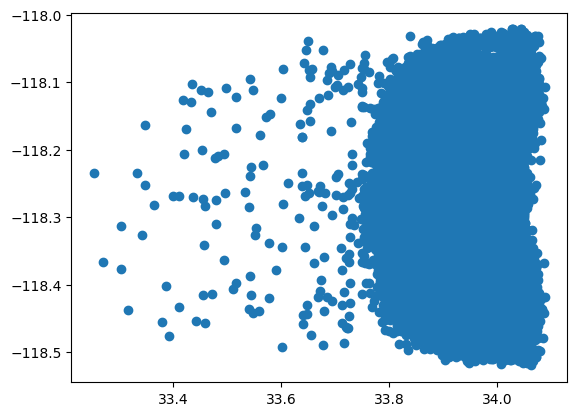

In [68]:
plt.scatter(x=df["lat"],y=df["lon"]);

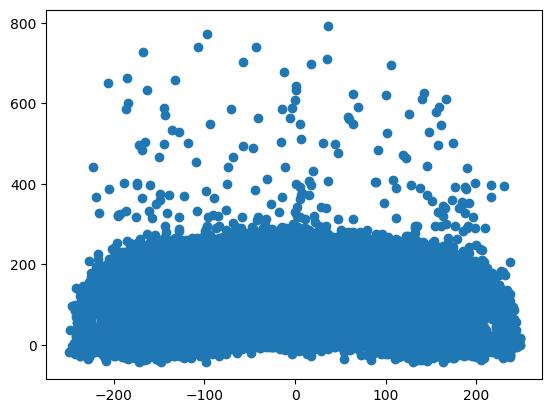

In [69]:
plt.scatter(x=df["loc_x"],y=df["loc_y"]);

---

**Note**: We are going to use only the `loc_x` and `loc_y` variables for the taken shot position because as we can see above `lat` and `lon` provide the same information but in a different coordinate system.
 
---

#### `shot_zone_area` vs. `shot_zone_basic` vs. `shot_zone_range`

In [70]:
df["shot_zone_area"].value_counts()

shot_zone_area
Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: count, dtype: int64

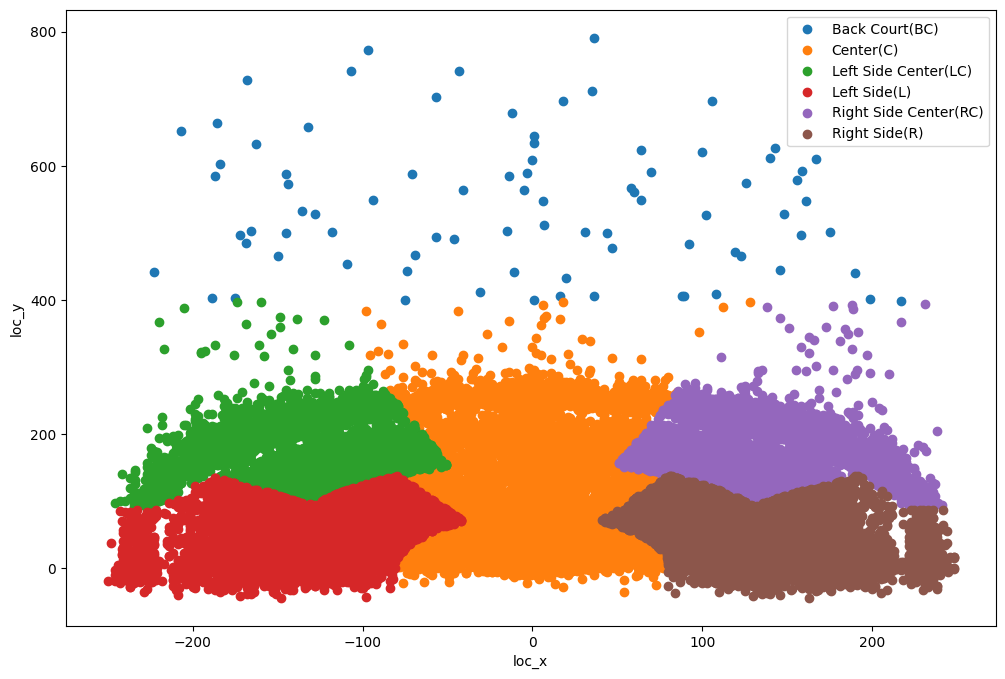

In [85]:
# Group by shot zone area
areas = df.groupby("shot_zone_area")

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each group with a different color
for name, area in areas:
    ax.scatter(area["loc_x"], area["loc_y"], label=name)

# Add labels and legend
ax.set_xlabel("loc_x")
ax.set_ylabel("loc_y")
ax.legend()

# Show plot
plt.show()

In [71]:
df["shot_zone_basic"].value_counts()

shot_zone_basic
Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: count, dtype: int64

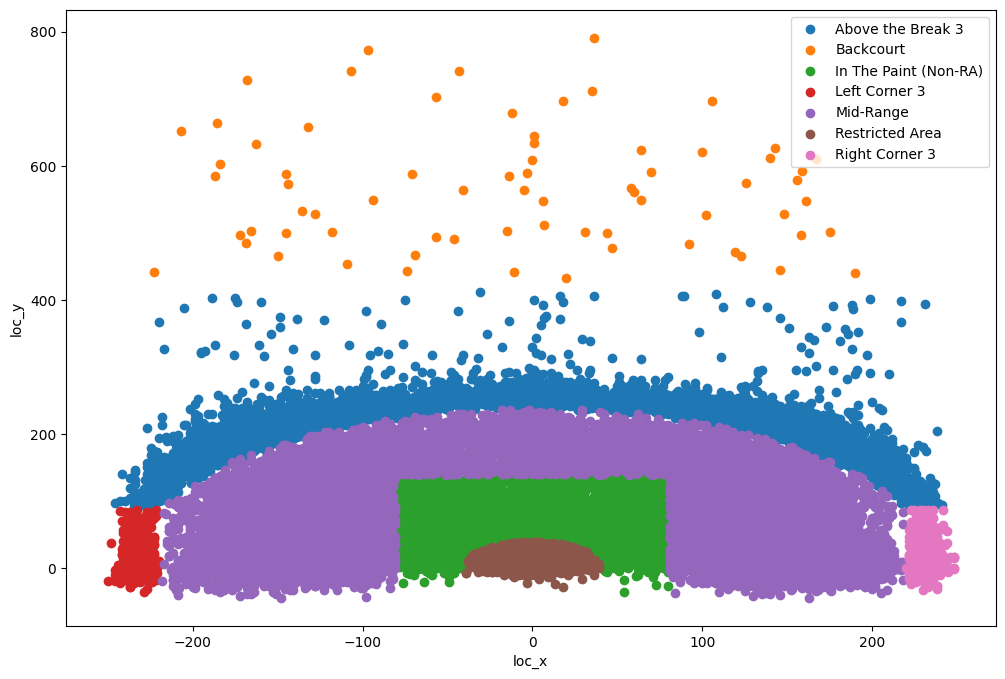

In [86]:
# Group by shot zone basic
areas = df.groupby("shot_zone_basic")

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each group with a different color
for name, area in areas:
    ax.scatter(area["loc_x"], area["loc_y"], label=name)

# Add labels and legend
ax.set_xlabel("loc_x")
ax.set_ylabel("loc_y")
ax.legend()

# Show plot
plt.show()

In [ ]:
df["shot_zone_range"].value_counts()

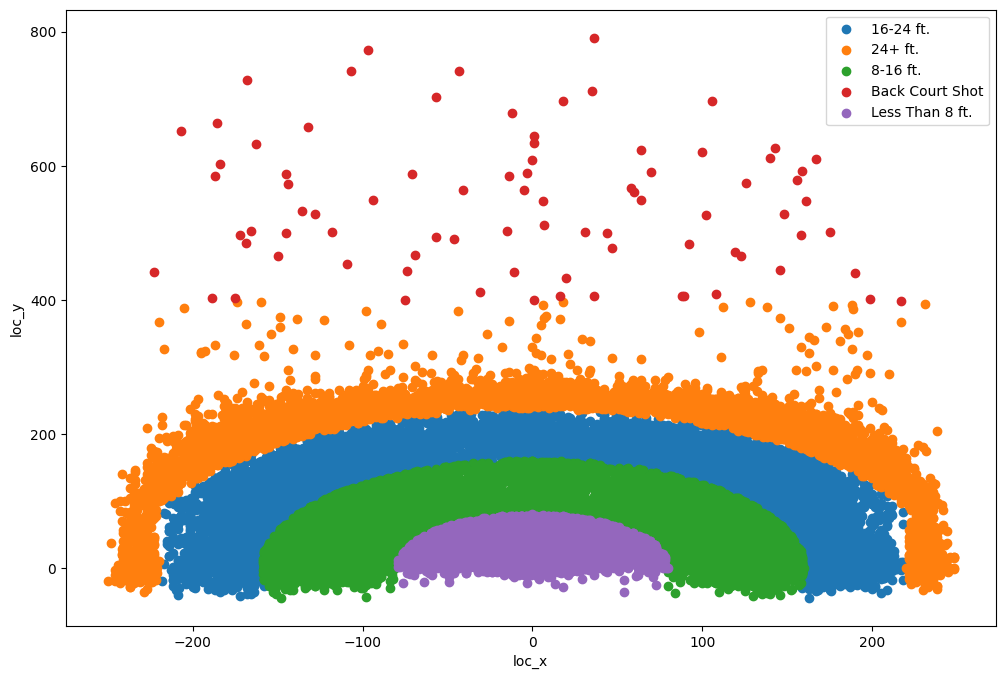

In [88]:
# Group by shot zone range
areas = df.groupby("shot_zone_range")

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each group with a different color
for name, area in areas:
    ax.scatter(area["loc_x"], area["loc_y"], label=name)

# Add labels and legend
ax.set_xlabel("loc_x")
ax.set_ylabel("loc_y")
ax.legend()

# Show plot
plt.show()

---

**Note:** Based on what we see in the plots of `shot_zone_area`, `shot_zone_basic`, and `shot_zone_range` we define a new variable `new_shot_zone_area` that combines the information of all three variables representing the official shot zone areas.

---

In [95]:
# Define new column with official shot zone areas
df["new_shot_zone_area"] = "Other"

df.loc[df["shot_zone_basic"] == "Backcourt", "new_shot_zone_area"] = "Backcourt"
df.loc[df["shot_zone_basic"] == "Above the Break 3", "new_shot_zone_area"] = "Above the Break 3"
df.loc[df["shot_zone_basic"] == "Left Corner 3", "new_shot_zone_area"] = "Left Corner 3"
df.loc[df["shot_zone_basic"] == "Right Corner 3", "new_shot_zone_area"] = "Right Corner 3"
df.loc[(df["shot_zone_area"] == "Left Side(L)") &
        (df["shot_zone_range"] == "16-24 ft."), "new_shot_zone_area"] = "Left Long Baseline"
df.loc[(df["shot_zone_area"] == "Left Side Center(LC)") &
        (df["shot_zone_range"] == "16-24 ft."), "new_shot_zone_area"] = "Left Long Wing"
df.loc[(df["shot_zone_area"] == "Center(C)") &
        (df["shot_zone_range"] == "16-24 ft."), "new_shot_zone_area"] = "Long Straight"
df.loc[(df["shot_zone_area"] == "Right Side Center(RC)") &
        (df["shot_zone_range"] == "16-24 ft."), "new_shot_zone_area"] = "Right Long Wing"
df.loc[(df["shot_zone_area"] == "Right Side(R)") &
        (df["shot_zone_range"] == "16-24 ft."), "new_shot_zone_area"] = "Right Long Baseline"
df.loc[(df["shot_zone_area"] == "Left Side(L)") &
        (df["shot_zone_range"] == "8-16 ft."), "new_shot_zone_area"] = "Left Mid Baseline to Elbow"
df.loc[(df["shot_zone_area"] == "Center(C)") &
        (df["shot_zone_range"] == "8-16 ft."), "new_shot_zone_area"] = "Mid Straight"
df.loc[(df["shot_zone_area"] == "Right Side(R)") &
        (df["shot_zone_range"] == "8-16 ft."), "new_shot_zone_area"] = "Right Mid Baseline to Elbow"
df.loc[df["shot_zone_range"] == "Less Than 8 ft.", "new_shot_zone_area"] = "Around Rim"

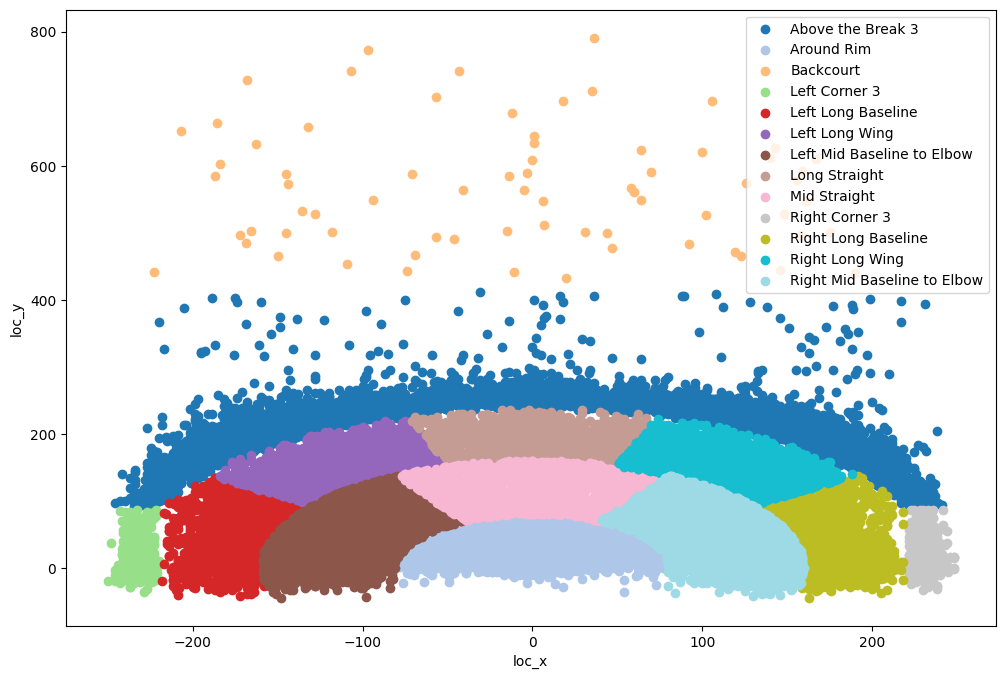

In [112]:
# Group by new shot zone range
areas = df.groupby("new_shot_zone_area")

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Get a colormap and create an iterator
cmap = matplotlib.colormaps["tab20"]
colors = iter(cmap(np.linspace(0, 1, len(areas))))

# Plot each group with a different color
for name, area in areas:
    ax.scatter(area["loc_x"], area["loc_y"], label=name, color=next(colors))

# Add labels and legend
ax.set_xlabel("loc_x")
ax.set_ylabel("loc_y")
ax.legend()

# Show plot
plt.show()

#### `minutes_remaining` vs. `seconds_remaining`

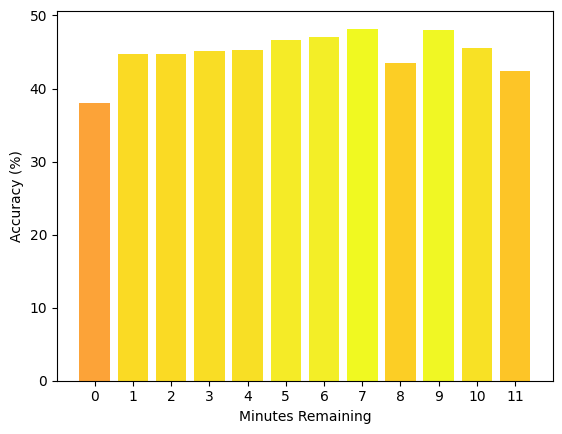

In [132]:
# Calculate accuracy for every minute remaining
accuracy = df.groupby("minutes_remaining")["shot_made_flag"].mean()*100

# Create a colormap
cmap = matplotlib.colormaps["plasma"]

# Plot the accuracy heatmap
plt.bar(accuracy.index.astype(str), accuracy, color=cmap(accuracy / accuracy.max()))
plt.xlabel("Minutes Remaining")
plt.ylabel("Accuracy (%)")
plt.show()

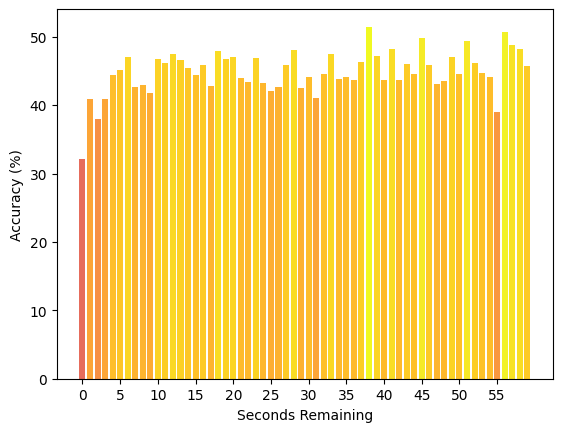

In [131]:
# Calculate accuracy for every second remaining
accuracy = df.groupby("seconds_remaining")["shot_made_flag"].mean()*100

# Create a colormap
cmap = matplotlib.colormaps["plasma"]

# Plot the accuracy heatmap
plt.bar(accuracy.index.astype(str), accuracy, color=cmap(accuracy / accuracy.max()))
plt.xlabel("Seconds Remaining")
plt.ylabel("Accuracy (%)")
plt.xticks(range(0, len(accuracy.index), 5), accuracy.index[::5])
plt.show()

---

**Note:** We are not sure if we should only consider `seconds_remaining` or also `minutes_remaining`. For now we are going to keep both and evaluate later in a deep dive.

---

Based on the first deeper analysis between a few variables we are going to remove the following variables:
- `action_type`
- `lat`
- `lon`
- `shot_zone_area`
- `shot_zone_basic`
- `shot_zone_range`

In [ ]:
# List of columns to remove
columns_to_remove = ["action_type",
                     "lat",
                     "lon",
                     "shot_zone_area",
                     "shot_zone_basic",
                     "shot_zone_range"]

# Remove the specified columns
df = df.drop(columns=columns_to_remove, axis=1)

#### This is the dataset we are left with:

In [137]:
df

,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_made_flag,shot_type,opponent,new_shot_zone_area
0,Jump Shot,167,72,10,1,0,2000-01,27,NaN,2PT Field Goal,POR,Right Long Baseline
1,Jump Shot,-157,0,10,1,0,2000-01,22,0.0,2PT Field Goal,POR,Left Mid Baseline to Elbow
2,Jump Shot,-101,135,7,1,0,2000-01,45,1.0,2PT Field Goal,POR,Left Long Wing
3,Jump Shot,138,175,6,1,0,2000-01,52,0.0,2PT Field Goal,POR,Right Long Wing
4,Dunk,0,0,6,2,0,2000-01,19,1.0,2PT Field Goal,POR,Around Rim
...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,1,48,6,4,1,1999-00,5,0.0,2PT Field Goal,IND,Around Rim
30693,Tip Shot,0,0,6,4,1,1999-00,5,NaN,2PT Field Goal,IND,Around Rim
30694,Jump Shot,-134,166,3,4,1,1999-00,28,1.0,2PT Field Goal,IND,Left Long Wing
30695,Jump Shot,31,267,2,4,1,1999-00,10,0.0,3PT Field Goal,IND,Above the Break 3


## 5. Experimental Results



## 6. Conclusions and Future Work



## 7. References

